<div style="background-color:lightgreen; border-style: double;border-color: #00beef;text-align:center;color:blue;font-size:25px;border-radius: 50px;padding: 20px 20px; font-family:Raleway;"><strong> Gashaw M. Goshu, Ph.D. in Chemistry</strong></div>

<div style="text-align:left;color:darkblue;font-size:20px; padding: 20px 20px;"><strong> Generating a molecular graph in RDKit, and accessing its atoms and bonds </strong></div>

Reference: RdKit [documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)

In [1]:
# ----------------------------------
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
# --- ------------------------------
import numpy as np
import pandas as pd

# Molecular Representation

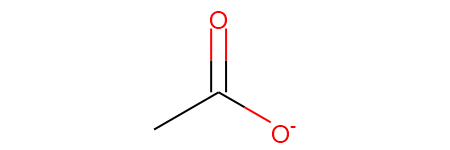

In [4]:
# Molecular graph
mol= Chem.MolFromSmiles('CC(=O)[O-]')
mol

## 1. Accessing atoms and their features from a molecular graph
Atom has :
* symbol, 
* index,
* atomic number,
* atomic mass, 
* hybridization and so on.

In [5]:
# Get atomic number 
mol.GetAtoms()[0].GetAtomicNum()

6

## Need to use a for loop

In [ ]:
# Accessing atomic symbol 
atom_symbols = []

for atom in mol.GetAtoms():
    atom_symbols.append(atom.GetSymbol())

In [ ]:
atom_symbols

In [ ]:
# Accessing atomic symbols

atm_symbols = [atom.GetSymbol() for atom in mol.GetAtoms()]
atm_symbols

In [ ]:
# Calculate the total number hydrogens

nub_hydrogens = [atom.GetTotalNumHs(includeNeighbors=True) for atom in mol.GetAtoms()]
nub_hydrogens

In [ ]:
# Informatin about Atoms

for atom in mol.GetAtoms():
    print(atom.GetIdx(),
          atom.GetSymbol(), 
          atom.GetAtomicNum(),
          atom.GetMass(),
          atom.GetHybridization(),
          atom.GetFormalCharge(),
          atom.GetDegree(),
          atom.GetTotalNumHs(includeNeighbors=True),
          atom.GetExplicitValence(),
          atom.GetIsAromatic())

##  2. Accessing bonds from a molecule


In [ ]:
# Accessing single, double and triple bonds

[bond.GetBondTypeAsDouble() for bond in mol.GetBonds()]

In [ ]:
# Informatin about Bonds

for bond in mol.GetBonds():
    print(bond.GetBondTypeAsDouble(),
          bond.GetBeginAtomIdx(), 
          bond.GetEndAtomIdx(), 
          bond.IsInRing())

## 3. Calculate some molecular properties

In [ ]:
# Define a function

def property_calc(smiles):
    MWt = []
    logp = []
    tpsa = []
    H_acceptors = []
    H_donors = []
    
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    for mol in mols:
        # calculate molecular weight 
        mwt = Descriptors.MolWt(mol)
        MWt.append(mwt)
        
        # calculate logp value       
        lgp =  Descriptors.MolLogP(mol)
        logp.append(lgp)
        
        # calculate polar surface area value 
        psa = Descriptors.TPSA(mol)
        tpsa.append(psa)
        
        # calculate hydrogen acceptors
        hba = Descriptors.NumHAcceptors(mol)
        H_acceptors.append(hba)
        
        # calculate hydrogen donors 
        hbd = Descriptors.NumHDonors(mol)
        H_donors.append(hbd)
        
    return MWt,logp, tpsa, H_acceptors, H_donors     

In [ ]:
# Some SMILES

smiles = ['C(=O)[O-]','CCC', 'CCO', 'c1ccccc1', 'C1CC(=O)C1']

In [ ]:
# Call a function

MWt,logp, tpsa, H_acceptors, H_donors  = property_calc(smiles)

In [ ]:
# Values 

MWt,logp, tpsa, H_acceptors, H_donors

In [ ]:
# Use vertical stack 

stacked = np.vstack([smiles, MWt,logp, tpsa, H_acceptors, H_donors]).T
stacked

In [ ]:
# Columns names

columns = ['SMILES','MW','logp','TPSA','H_acceptors', 'H_donors']

In [ ]:
# Put the values in the dataframe

df = pd.DataFrame(data=stacked, columns=columns)
df

In [ ]:
# All descriptors in RDKit

len(Descriptors._descList)

If you wish to calculate all the descriptors available in RDKit click this [video](https://www.youtube.com/watch?v=9i9SY6Nd1Zw&t=60s) or [notebook](https://github.com/gashawmg/molecular-descriptors/blob/main/Molecular%20descriptors.ipynb) 